In [16]:
# https://github.com/LukeDitria/pytorch_tutorials/blob/main/section02_pytorch_basics/notebooks/Tutorial1_Pytorch_Basics.ipynb

In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [18]:
class SimpleFunction(nn.Module):
    def __init__(self):
        super(SimpleFunction, self).__init__()

    def forward(self, x):
        return x * 2 + 4

In [19]:
simple_function = SimpleFunction()
# perform the forward pass
output = simple_function(10)
print(output)

24


In [20]:
class LinearModel(nn.Module):
    """
    Takes the input x and returns the output x * w^t + b
    """
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.w = nn.Parameter(torch.randn(output_size, input_size))
        self.b = nn.Parameter(torch.randn(1, output_size))

    def forward(self, x):
        return torch.matmul(x, self.w.t()) + self.b

In [21]:
input_data = torch.randn(10, 5)
print(input_data)

tensor([[ 0.9196, -1.5991,  1.0505, -0.8569, -0.8793],
        [ 0.1523,  0.0779,  1.0046,  0.1098, -0.8151],
        [-0.4878, -0.9652,  0.0731, -1.2769, -0.1231],
        [ 0.1520,  0.2981,  0.7367, -0.0525, -0.0895],
        [-1.3556, -0.2290,  0.0700,  1.3226,  0.6139],
        [ 0.8232,  0.6851, -0.3162,  1.4883, -1.1874],
        [-0.8190, -1.4161, -0.8168, -1.1742,  0.8445],
        [ 1.7818, -0.1779, -1.3720,  0.2005, -1.0055],
        [ 0.2335, -0.5991, -0.8302,  1.1727, -2.2059],
        [ 0.7265,  1.5776, -1.7726, -0.0507,  0.0067]])


In [22]:
linear_model = LinearModel(5, 1)
output = linear_model(input_data)

print(output.shape)
print(output.detach())

torch.Size([10, 1])
tensor([[-2.6494],
        [-3.2368],
        [-0.2372],
        [-2.0661],
        [-2.2230],
        [-4.1407],
        [ 1.3237],
        [-1.9264],
        [-4.4839],
        [ 0.2016]])


**Pytorch inbuilt Neural Network Layers**

In [23]:
# Build a linear layer aka a "fully connected" layer aka a "Perceptron" layer
# nn.Linear(Number of inputs, Number of outputs) 
linear = nn.Linear(3, 1) 

# Lets have a look at the parameters of this layer
# The "weights" are what is multipied by the input data
print ('w:\n', linear.weight.data)
# The bias is then added on!
print ('b:\n', linear.bias.data)

print ('w shape:\n', linear.weight.data.shape)
print ('b shape:\n', linear.bias.data.shape)

w:
 tensor([[ 0.0505,  0.5630, -0.5259]])
b:
 tensor([0.1401])
w shape:
 torch.Size([1, 3])
b shape:
 torch.Size([1])


In [24]:
# Lets have a look at the gradients of these parameters
print ('w:\n', linear.weight.grad)
print ('b:\n', linear.bias.grad)
# Note: Pytorch initialises the grad of the tensors to "None" NOT 0!
# They only get created after the first backwards pass.

w:
 None
b:
 None


In [25]:
# Create a random data input tensor
data = torch.randn(100, 3)
# Create some noisey target data
target = data.sum(1, keepdims=True) + 0.01*torch.randn(data.shape[0], 1)
print ('Input data:\n', data[:10])
print ('Output data:\n', target[:10])

Input data:
 tensor([[-1.0622, -1.0838,  1.1487],
        [-1.2904, -0.2212,  0.4652],
        [-1.1687,  0.0958, -0.1772],
        [-0.0270,  1.5988,  2.0372],
        [-0.0467,  0.9119, -0.9777],
        [-0.2547, -0.8765, -0.2199],
        [-0.4122, -1.3749, -1.3129],
        [-0.8484,  0.1532, -0.1320],
        [ 0.4284,  0.4263, -0.4045],
        [ 2.6583,  2.1352, -1.2488]])
Output data:
 tensor([[-0.9759],
        [-1.0591],
        [-1.2398],
        [ 3.6105],
        [-0.1155],
        [-1.3347],
        [-3.1014],
        [-0.8503],
        [ 0.4551],
        [ 3.5458]])


In [26]:
# Remember! To perform a forward pass of our model, we just need to "call" our network
# Pytorch's nn.Module class will automatically pass it to the "forward" function in the layer class
target_pred = linear(data)
print("Network output:\n", target_pred.data[:10])
print("Network output shape:", target_pred.shape)

Network output:
 tensor([[-1.1279],
        [-0.2943],
        [ 0.2282],
        [-0.0324],
        [ 1.1653],
        [-0.2507],
        [ 0.0355],
        [ 0.2529],
        [ 0.6144],
        [ 2.1332]])
Network output shape: torch.Size([100, 1])


**Loss Functions and Optimizers**

In [27]:
# Lets perform a regression with a mean square error loss
loss_function = nn.MSELoss()

# Lets create a Stochastic gradient descent optimizer with a learning rate of 0.01
# (the way we will be using it, it is just normal GD) 
# When we create the optimizer we need to tell it WHAT it needs to optimize, so the first thing 
# We pass it are the linear layer's "parameters"
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) 

Text(0, 0.5, 'Ouputs')

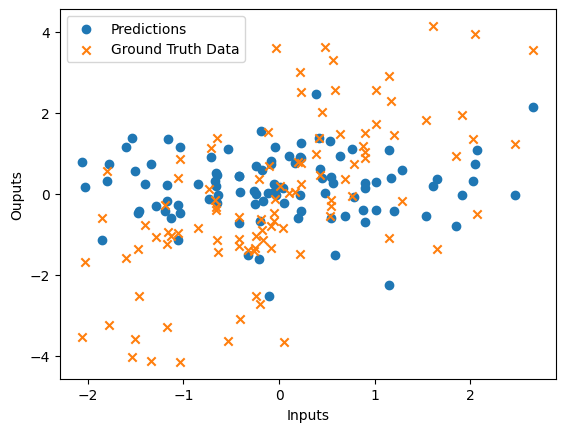

In [28]:
# Plotting the first dimension of the input vs the output

# Use the outputs of the model from a few cells ago
plt.scatter(data[:, 0], target_pred.detach())
# Use the Ground Truth data
plt.scatter(data[:, 0], target, marker="x")
plt.legend(["Predictions", "Ground Truth Data"])
plt.xlabel("Inputs")
plt.ylabel("Ouputs")

In [29]:
loss = loss_function(target_pred, target)
print('loss:', loss.item())

loss: 4.344559192657471


In [30]:
# Backward pass.
loss.backward()
# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)
# Note for every backwards pass of the model we must first perform a forward pass
# as data from parts of the computational graph have been deleted upon the backward pass to save memory.
# We can tell Pytorch to hold onto this data, but, in many cases it needs to be recalculated anyway

dL/dw:  tensor([[-2.4181, -0.9556, -3.8634]])
dL/db:  tensor([0.5827])


In [31]:
optimizer.step()

# Perform another forward pass of the model to check the new loss
target_pred = linear(data)
loss = loss_function(target_pred, target)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  4.127100944519043


**The Training Loop**
For MOST tasks (but not all) a simgle training iteration in Pytorch can be summarised in the following 5 steps:
- Forward pass of our model with the data.
- Calculate the loss.
- Reset the current stored gradients to 0
- Backpropagate the loss to calculate the new gradients.
- Perform an optimization step.

In [32]:
loss_logger = []

for i in range(1000):
    # Perform a forward pass of our data
    target_pred = linear(data)
    
    # Calculate the loss
    loss = loss_function(target_pred, target)
    
    # .zero_grad sets the stored gradients to 0
    # If we didn't do this they would be added to the 
    # Gradients from the previous step!
    optimizer.zero_grad()
    
    # Calculate the new gradients
    loss.backward()
    
    # Perform an optimization step!
    optimizer.step()

    loss_logger.append(loss.item())
    
print("loss:", loss.item())

loss: 0.00011130240454804152


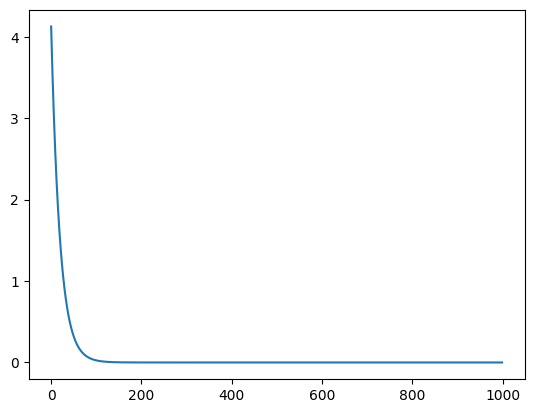

In [33]:
plt.plot(loss_logger)

Text(0, 0.5, 'Ouputs')

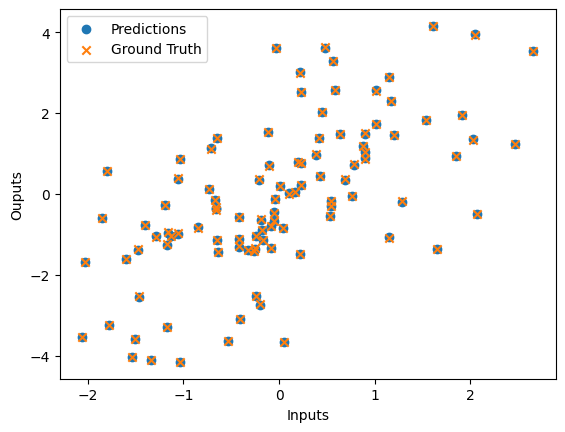

In [34]:
# Plotting the first dimension of the input vs the output
plt.scatter(data[:, 0], target_pred.detach())
plt.scatter(data[:, 0], target, marker="x")
plt.legend(["Predictions", "Ground Truth"])
plt.xlabel("Inputs")
plt.ylabel("Ouputs")